In [57]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')


In [10]:
#!pip install yfinance
#!pip install pandas
#!pip install matplotlib
!pip install bs4

In [69]:
#importing libraries
import pandas as pd

import yfinance as yf
import requests
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [70]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

## Question 1 - Extracting Tesla Stock Data Using yfinance

In [71]:
tesla_data = yf.Ticker('TSLA')

tesla_data = tesla_data.history(period='max')

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [72]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text

soup = BeautifulSoup(html_data,"html5lib")

tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame([{"Date":Date, "Revenue":Revenue}])], ignore_index=True)

In [73]:

Tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [74]:
GameStop=yf.Ticker("GME")

gme_data = GameStop.history(period = 'max')

gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [75]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], ignore_index = True)

In [76]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5 - Tesla Stock and Revenue Dashboard

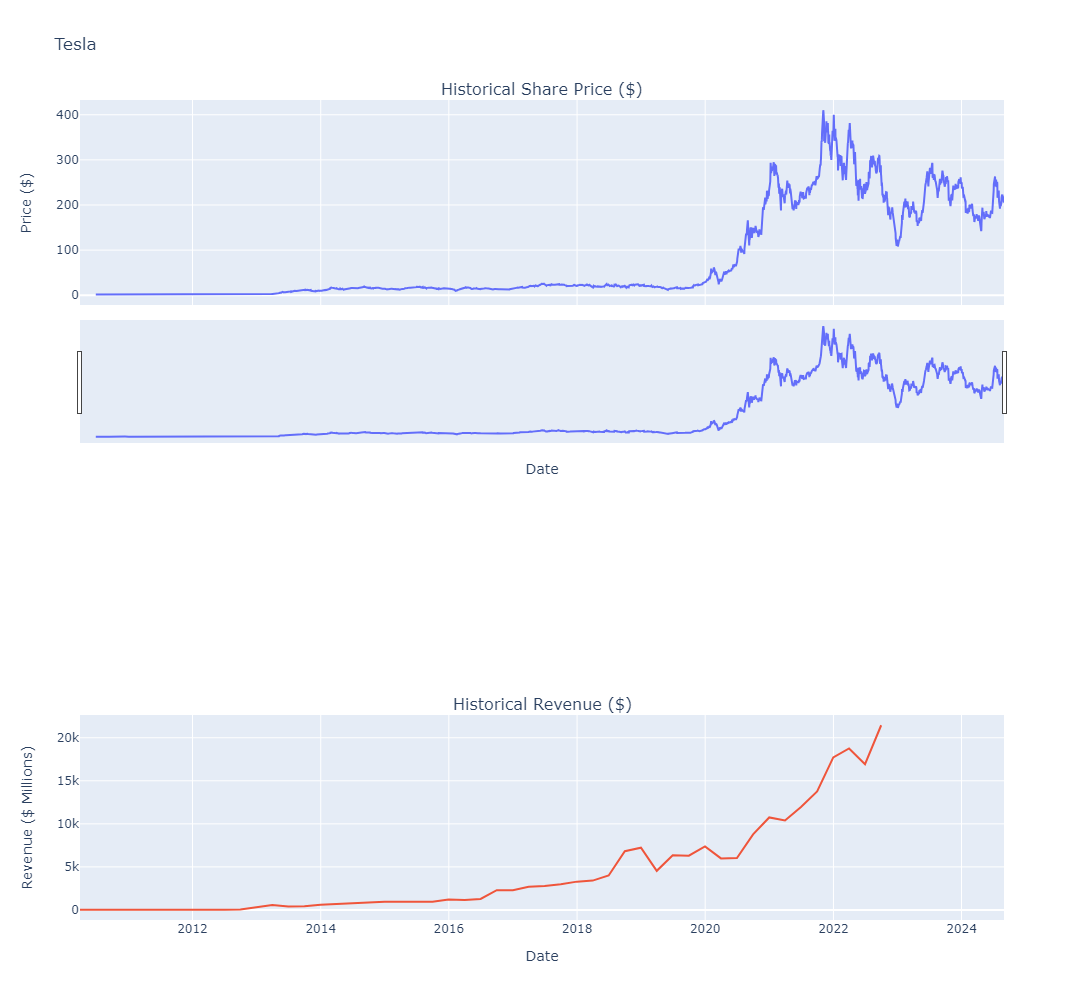

In [79]:
Tesla_revenue = Tesla_revenue[0:51]
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tsla_data, Tesla_revenue, 'Tesla')

## Question 6 - GameStop Stock and Revenue Dashboard

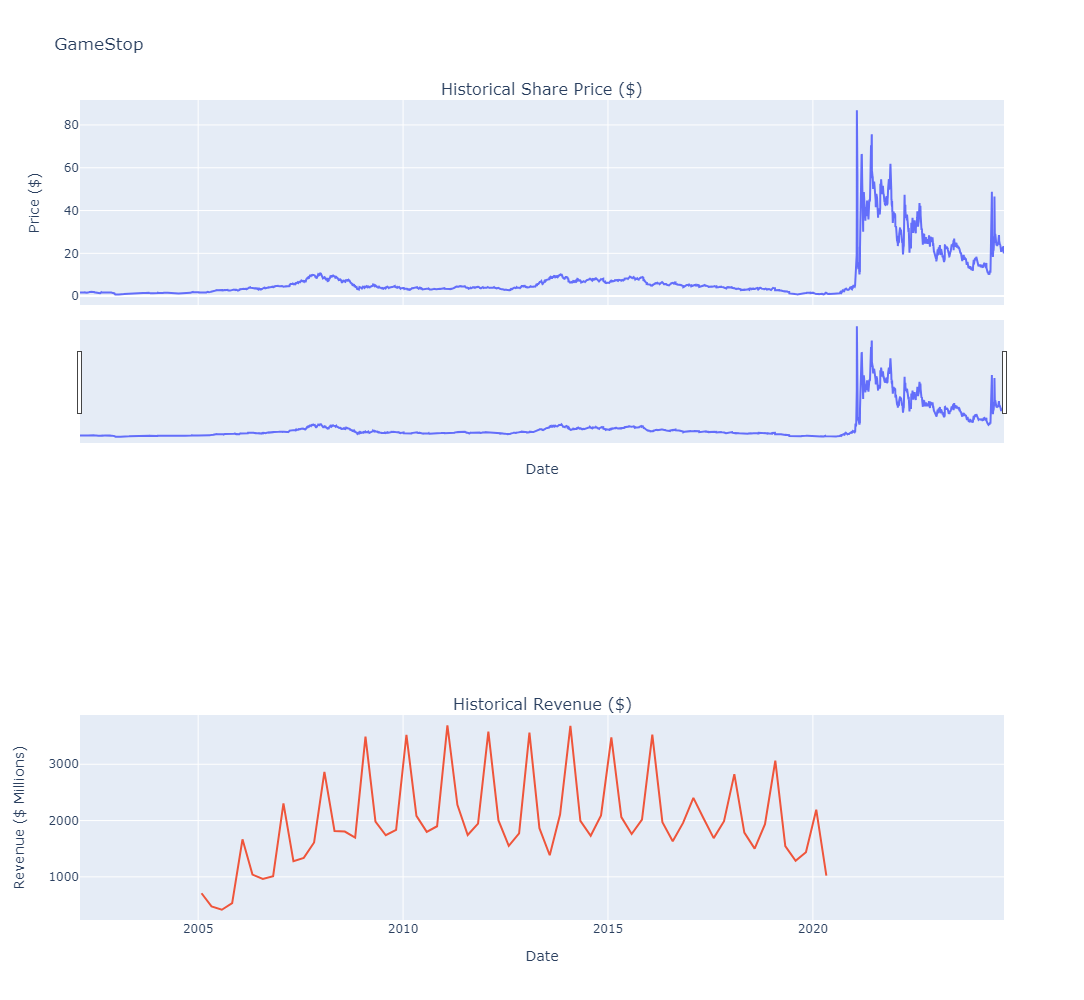

In [80]:
make_graph(gme_data, gme_revenue, 'GameStop')
